# added spacial variance

# added difusion calculation and dispersivity

# 1. N_particles = 10000

# 2. The time step was reduced from 100 [min] to 10 [min]. maybe that is causing the riple in y-direction moments. 

### The simulation was run with only one seed for the random generator.

In [1]:
import particles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
import scipy

In [2]:
from scipy import stats

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (20, 15)

In [5]:
files = ["./data/test_250_nm.txt", 
         "./data/test_500_nm.txt", 
         "./data/test_750_nm.txt",
         "./data/test_1000_nm.txt",
         "./data/test_1250_nm.txt",
         "./data/test_1500_nm.txt",
         "./data/test_1750_nm.txt",
         "./data/test_2000_nm.txt"]

### the end of the media

In [6]:
L = 120 #mm

### particle diameter range [nm]

In [7]:
d =range(250,2250,250)
print(d)

[250, 500, 750, 1000, 1250, 1500, 1750, 2000]


In [8]:
def mom(n, position, time, m0):
    n=n
    mn = np.zeros(time.shape[0])
    for i in range(position.shape[1]):
        if m0[i]==0:
            print("no more particles in the media for moment_{1} [m^{1}] @ time = {0} [min]".format(time[i],n))
            print("")
            break
        else:
            mn[i] = np.sum(position[i]**n)/m0[i]
    return mn

In [ ]:
mom1x = []
mom1y = []
mom2x = []
mom2y = []
v_p= []
for f in files[:]:
    print(f)
    p = particles.Particles(f, dimension=2, time_start=0, time_end=20000, time_step=10)
    m0 = []
    for i in range(p.qx.shape[1]):
        x_data = p.qx[i]
        # count particles in media that are before the outlet of the mesh
        particles_in_media = ((x_data>=0) & (x_data !=np.nan) & (x_data<=120)).sum()
        m0.append(particles_in_media)
    m1x = mom(n=1,position=p.qx,time=p.time, m0=m0)
    m1y = mom(n=1,position=p.qy,time=p.time, m0=m0)
    m2x = mom(n=2,position=p.qx,time=p.time, m0=m0)
    m2y = mom(n=2,position=p.qy,time=p.time, m0=m0)
    mom1x.append(m1x)
    mom1y.append(m1y)
    mom2x.append(m2x)
    mom2y.append(m2y)

./data/test_250_nm.txt
no more particles in the media for moment_1 [m^1] @ time = 10780 [min]

no more particles in the media for moment_1 [m^1] @ time = 10780 [min]

no more particles in the media for moment_2 [m^2] @ time = 10780 [min]

no more particles in the media for moment_2 [m^2] @ time = 10780 [min]

./data/test_500_nm.txt
no more particles in the media for moment_1 [m^1] @ time = 6680 [min]

no more particles in the media for moment_1 [m^1] @ time = 6680 [min]

no more particles in the media for moment_2 [m^2] @ time = 6680 [min]

no more particles in the media for moment_2 [m^2] @ time = 6680 [min]

./data/test_750_nm.txt
no more particles in the media for moment_1 [m^1] @ time = 13340 [min]

no more particles in the media for moment_1 [m^1] @ time = 13340 [min]

no more particles in the media for moment_2 [m^2] @ time = 13340 [min]

no more particles in the media for moment_2 [m^2] @ time = 13340 [min]

./data/test_1000_nm.txt
no more particles in the media for moment_1 [m^

# Plot the zero-moment (particles in media)

In [ ]:
time = []
for l in range(20,130,10):
    m0 = []
    for i in range(p.qx.shape[1]):
        x_data = p.qx[i]
        c = ((x_data>0) & (x_data !=np.nan) & (x_data <=l)).sum()
        m0.append(c)
    m = pd.DataFrame(m0)
    m.index = p.time
    m_ = m[m[0]>1] # more that one particle in the media. 
    plt.plot(m_, label="slice @L= {0} mm".format(l))
plt.title("Particles in media versus time @ various cross sections")
plt.xlabel("time [min]")
plt.ylabel("N_par in media M_0 [-]")
plt.legend(fontsize=20)

## The number of particles in the media drops down to 1 particle after 5000-6000 min.

### plot particle velocity ratios.

In [ ]:
plume_vel=[]
v_ave = 0.0000006*1000*60 #(m/s)(1000mm/1m)(60s/1min) # this velocity is found at the line where the paricles are on
v_ratio = []
for m1 in mom1x:
    slope, intercept, r_value, p_value, std_err = stats.linregress(p.time[:300],m1[:300])
    v_ratio.append(slope/v_ave)
plt.plot(d[:len(mom1x)],v_ratio)
plt.ylabel("ratio v_plume/v_average [-]")
plt.xlabel("particle_diameter [nm]")
plt.grid()

# Moments Order 1

### x-direction

In [12]:
max_ = np.where(p.time==3000)[0][0]
print(max_)

300


### x-direction

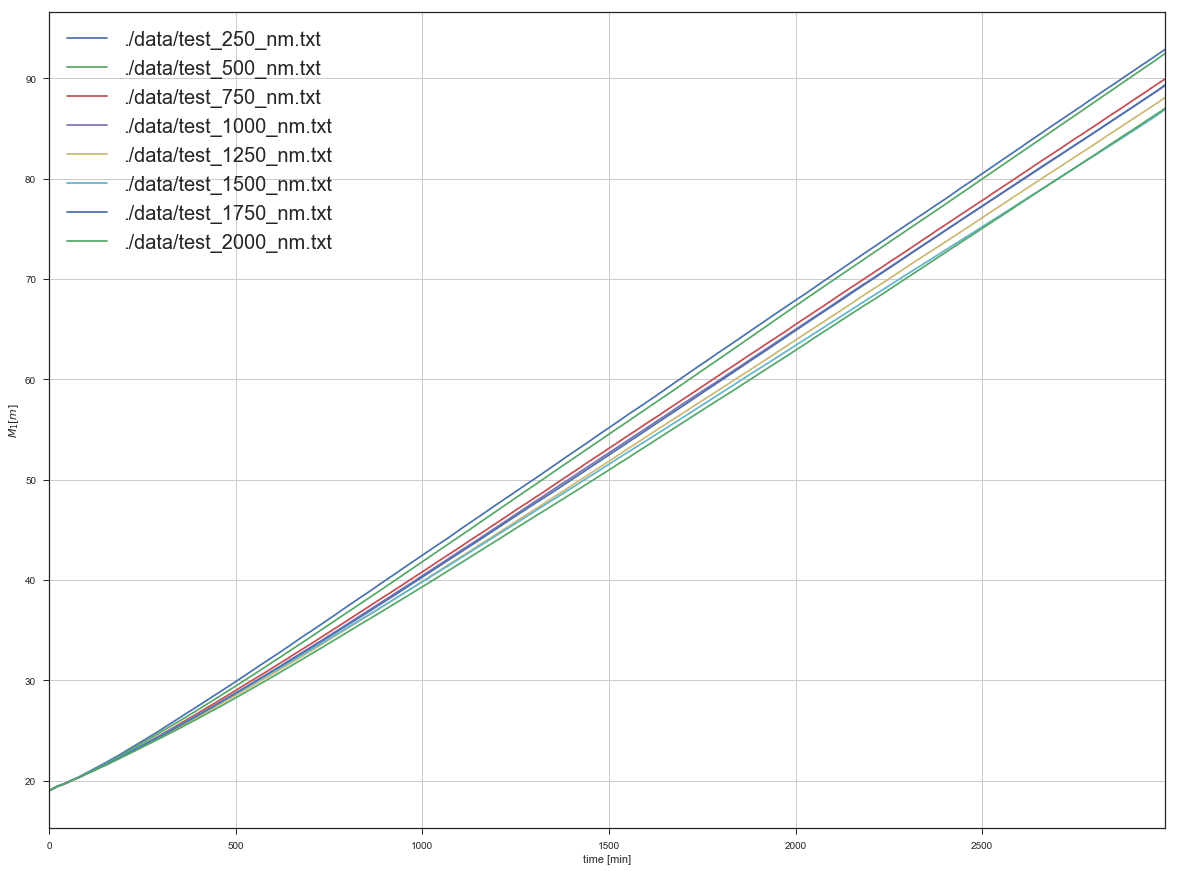

In [13]:
m1x=pd.DataFrame(mom1x[:]).T
m1x.columns = files
m1x.index = p.time
m1x.iloc[:max_].plot()
# m1x[m1x.loc[:,:]<100].plot()
plt.ylabel(r"$M_1 [m]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction

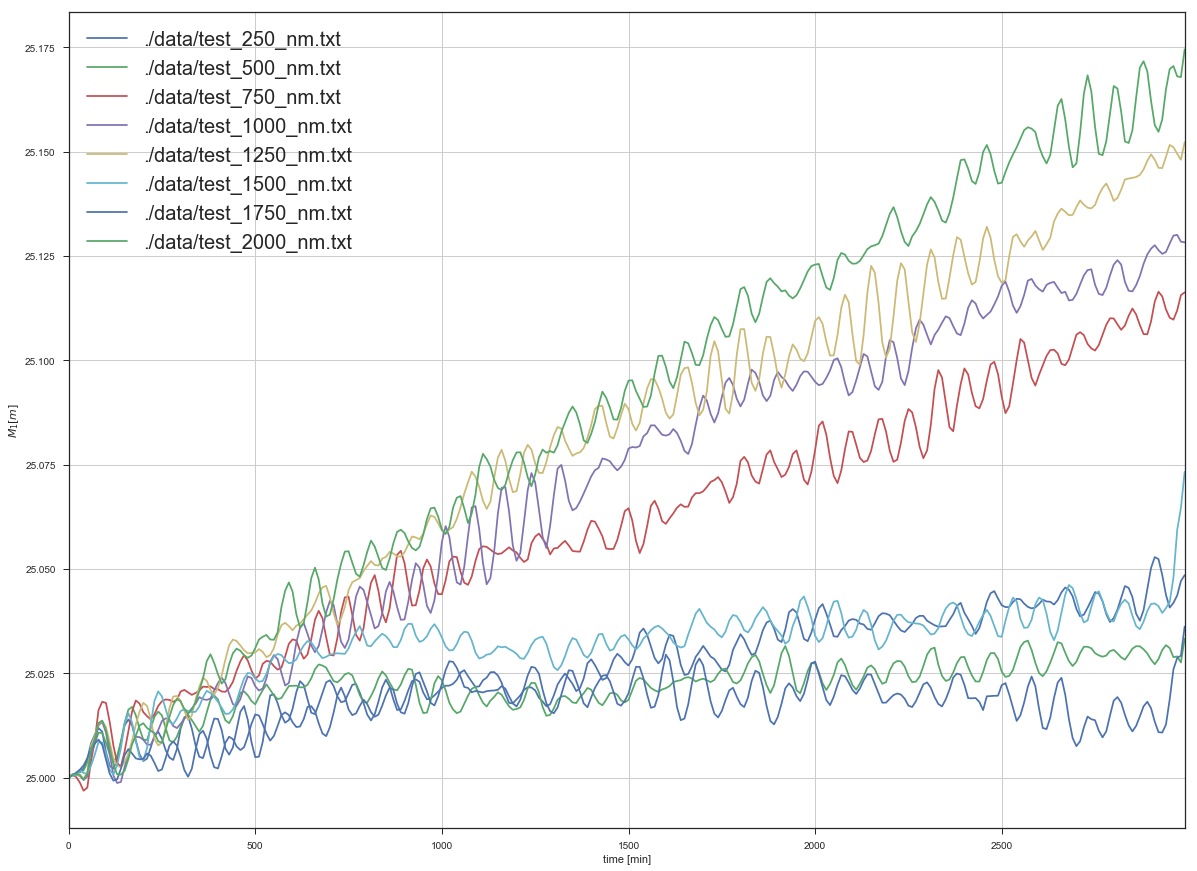

In [14]:
m1y=pd.DataFrame(mom1y[:]).T
m1y.columns = files
m1y.index = p.time
m1y.iloc[:max_].plot()
plt.ylabel(r"$M_1 [m]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

# Moments Order 2

### x-direction

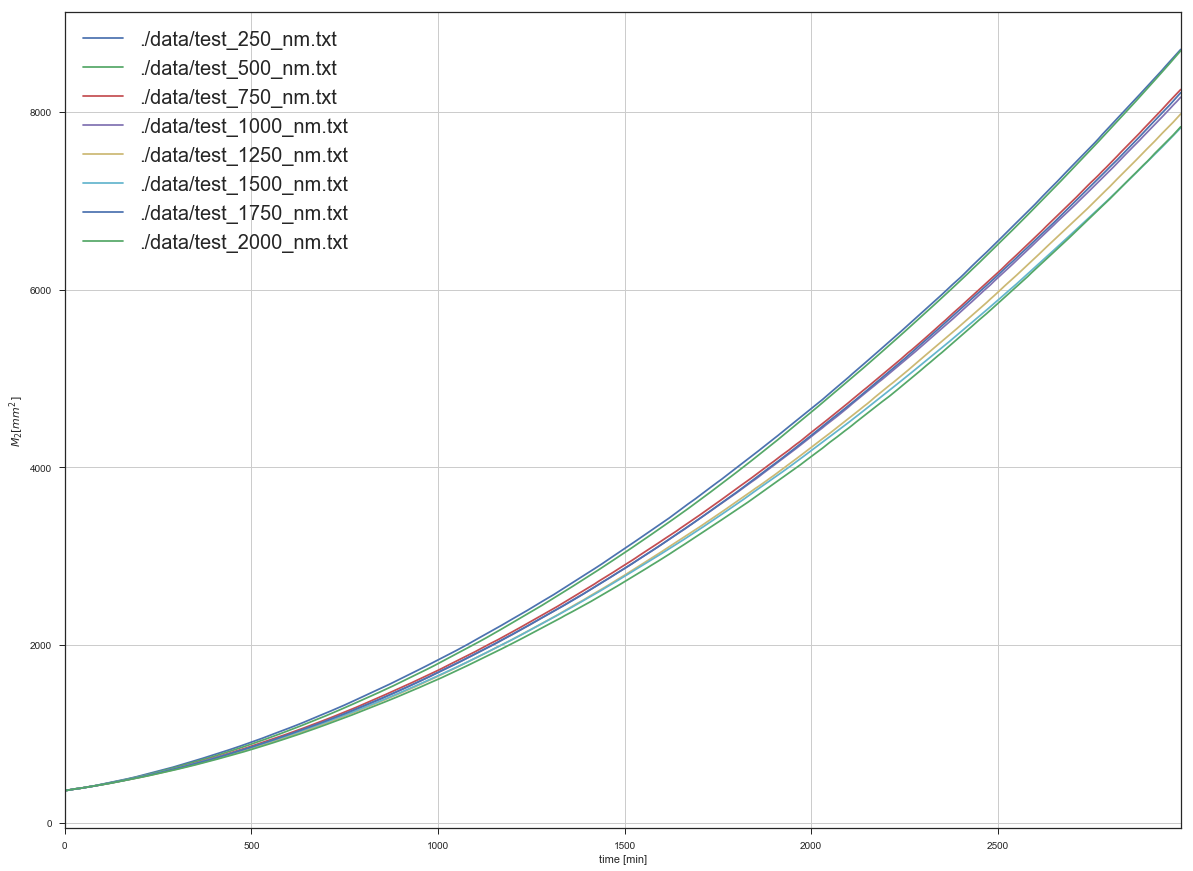

In [77]:
m2x=pd.DataFrame(mom2x[:]).T
m2x.columns = files
m2x.index = p.time
m2x.iloc[:max_].plot()
plt.ylabel(r"$M_2 [mm^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction

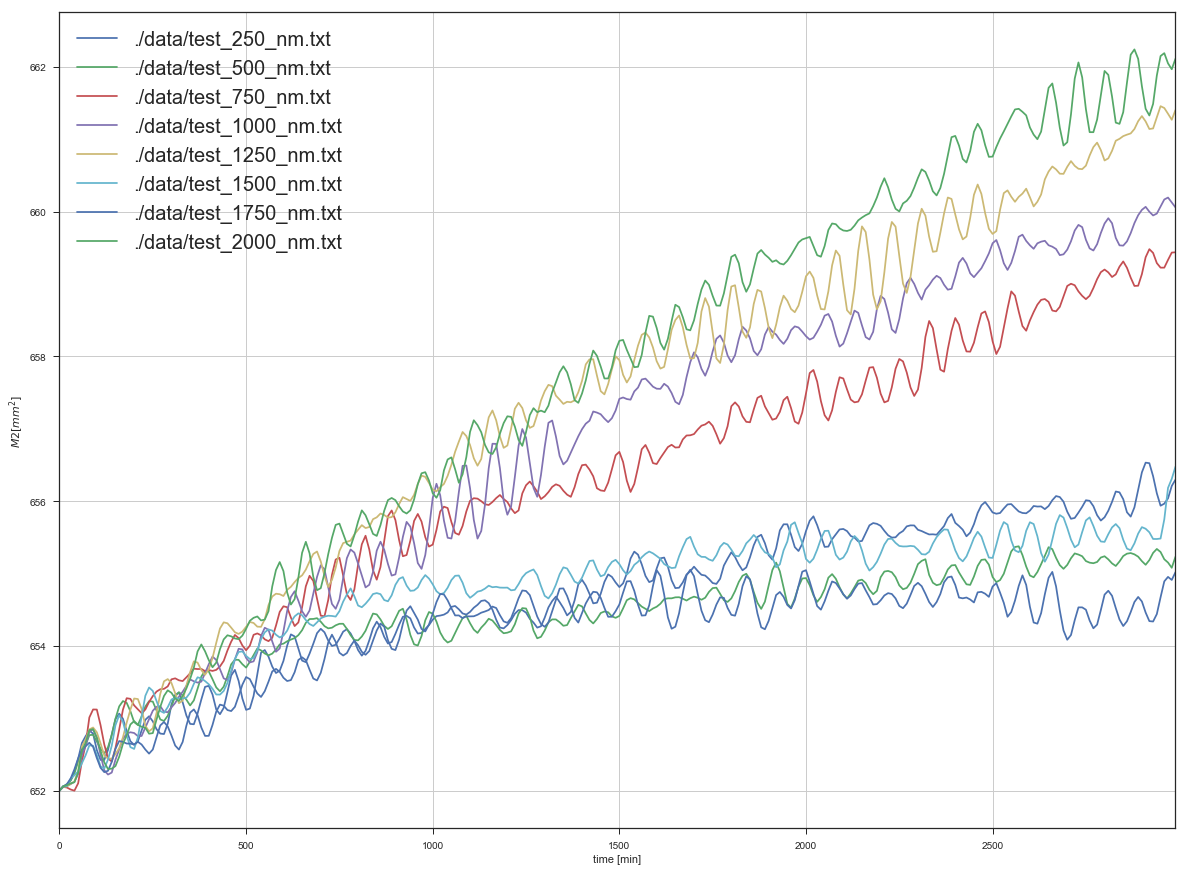

In [78]:
m2y=pd.DataFrame(mom2y[:]).T
m2y.columns = files
m2y.index = p.time
m2y.iloc[:max_].plot()
plt.ylabel(r"$M2 [mm^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction with moving average

In [85]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

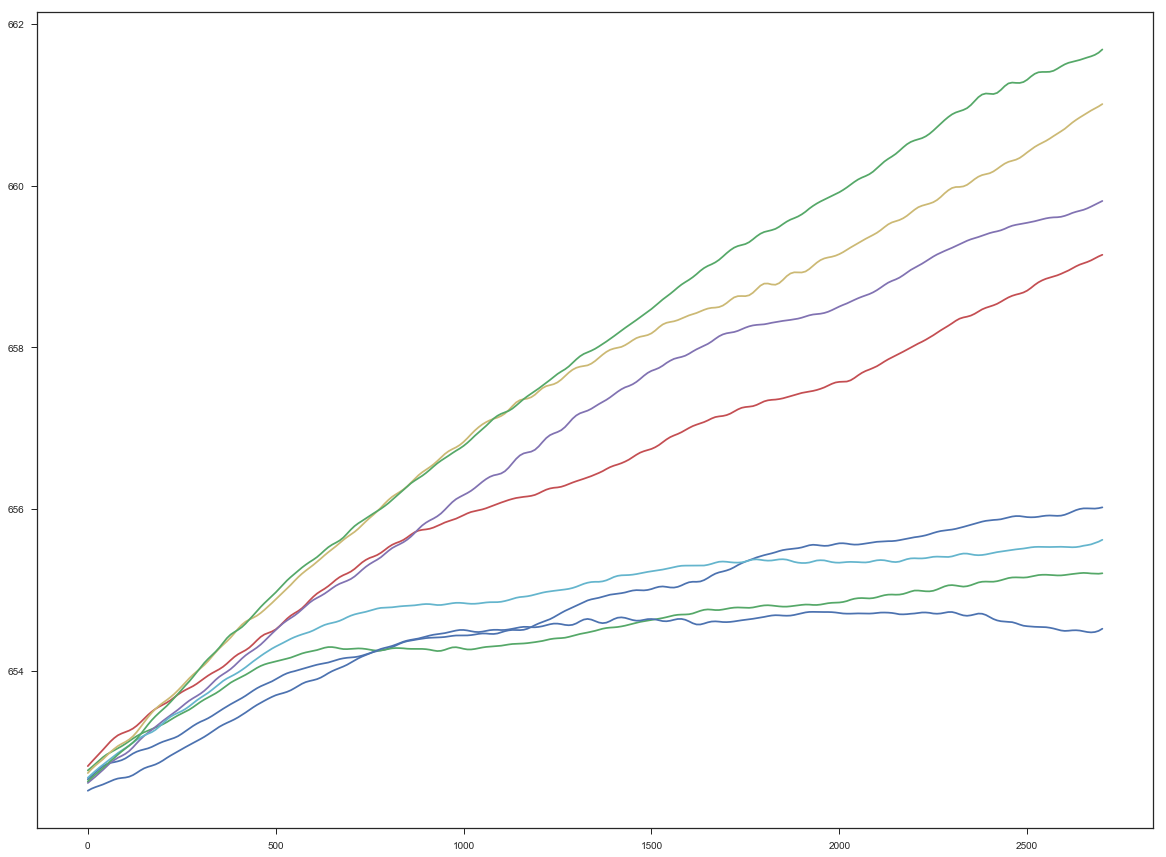

In [124]:
for di in files:
    ma = moving_average(m2y[di].values[:max_], n=30)
    t = p.time[:ma.shape[0]]
    plt.plot(t,ma)

# SPATIAL VARIANCE

$${σ_x}^2= \frac{{m_2}}{{m_0}} -μ^2  ---where--- (μ = \frac{{m_1}}{{m_0}})$$

In [125]:
sx2 = m2x - m1x**2
sy2 = m2y - m1y**2

In [126]:
max_2 = np.where(p.time==3000)[0][0]
print(max_2)

300


### x-direction

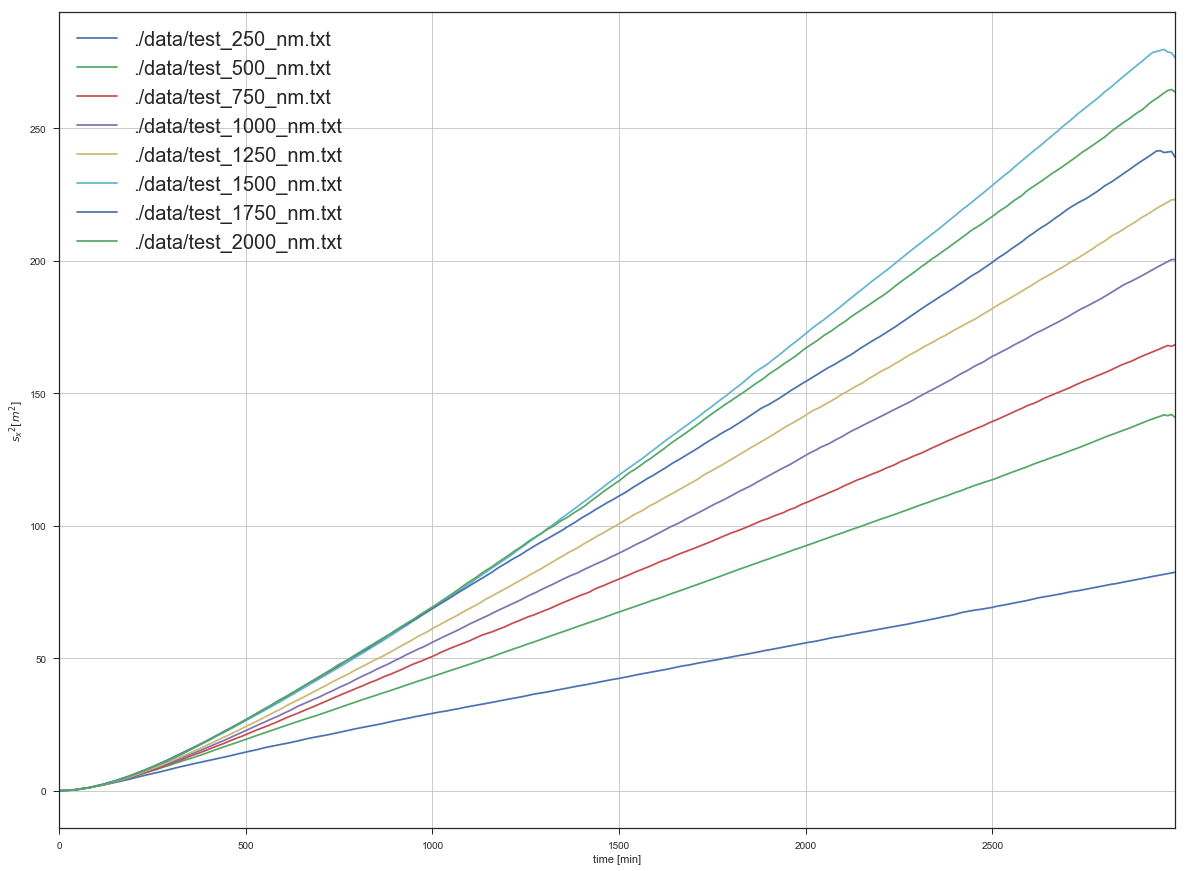

In [127]:
sx2.iloc[:max_2].plot()
plt.ylabel(r"${s_x}^2 [m^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction

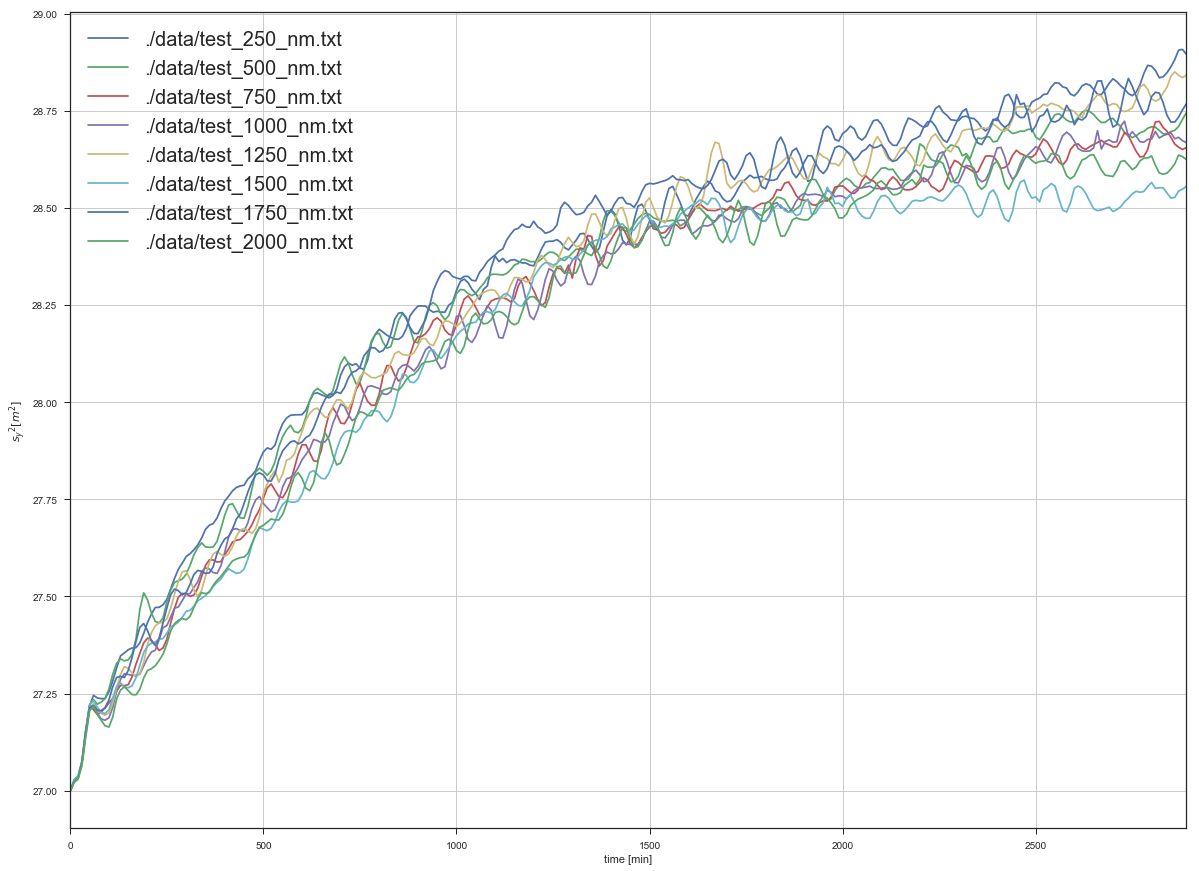

In [128]:
sy2.iloc[:max_2-10].plot()
plt.ylabel(r"${s_y}^2 [m^2]$")
plt.xlabel("time [min]")
plt.grid()
plt.legend(fontsize=20)

### y-direction with moving average

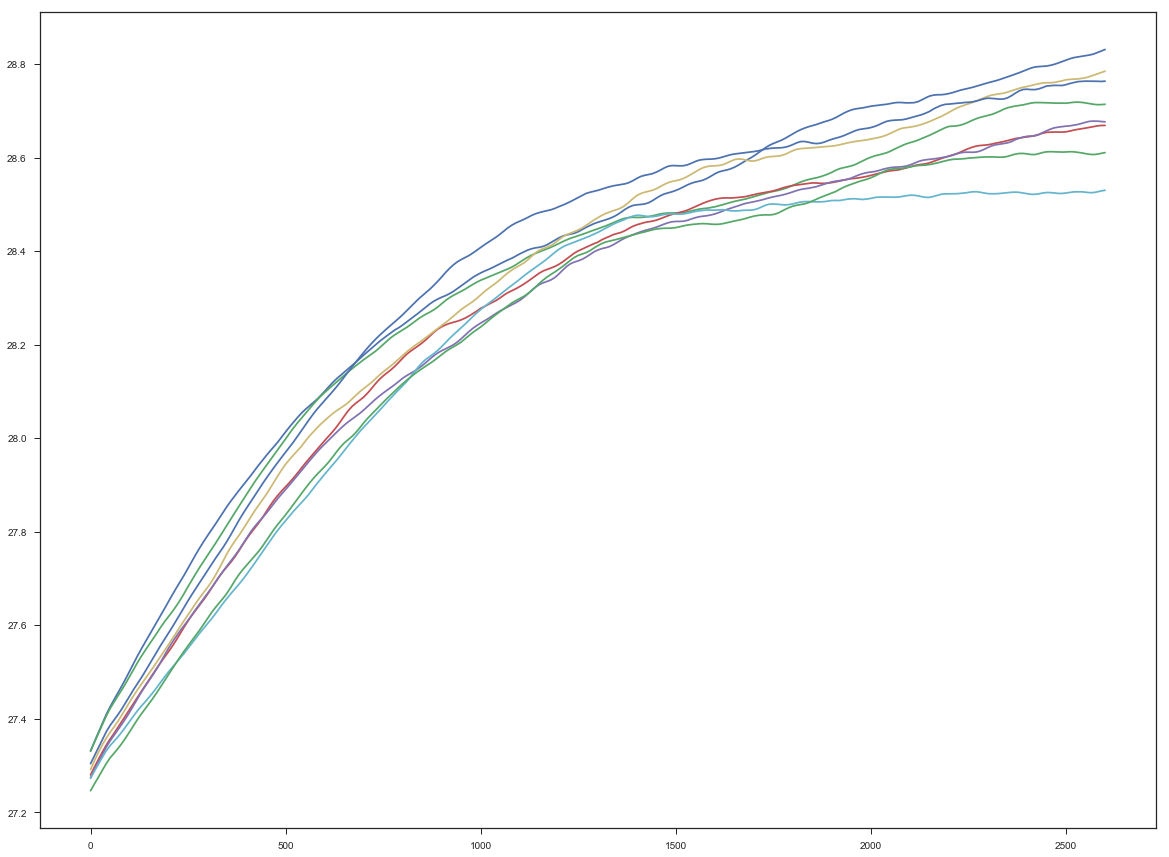

In [129]:
for di in files:
    ma = moving_average(sy2[di].values[:max_-10], n=30)
    t = p.time[:ma.shape[0]]
    plt.plot(t,ma)

# computing diffusion coeficient

${s_x}^2 = 2{D_m}_xt$

### x-direction

The R^2 value for the diameter 250 [nm] is: 0.99925172131. The intersept is: 0.673272584718
The R^2 value for the diameter 500 [nm] is: 0.999449862864. The intersept is: -5.11476335846
The R^2 value for the diameter 750 [nm] is: 0.999352214467. The intersept is: -7.14353719701
The R^2 value for the diameter 1000 [nm] is: 0.997801485331. The intersept is: -11.6461270871
The R^2 value for the diameter 1250 [nm] is: 0.997873273648. The intersept is: -13.8130464924
The R^2 value for the diameter 1500 [nm] is: 0.993480778155. The intersept is: -23.7058044783
The R^2 value for the diameter 1750 [nm] is: 0.998211703395. The intersept is: -14.2932559551
The R^2 value for the diameter 2000 [nm] is: 0.996721310549. The intersept is: -19.032949445


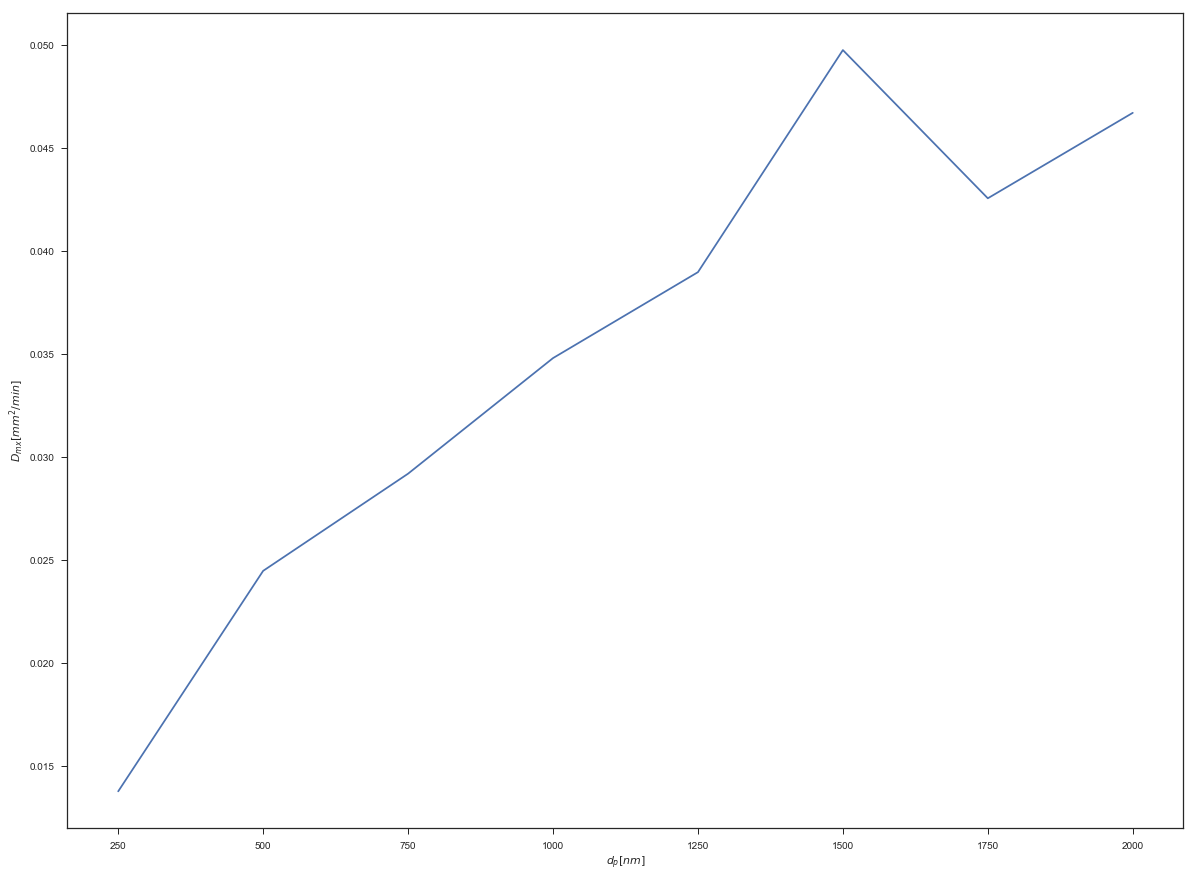

In [130]:
dmx = []
for di in sx2.columns:
    data = sx2[di].iloc[:max_2]
    slope, intercept, r_value, p_value, std_err = stats.linregress(data.index[:300],data.values[:300])
    print("The R^2 value for the diameter {1} [nm] is: {0}. The intersept is: {2}".format(r_value**2,di.split("_")[-2], intercept))
    dmx.append(slope/2)

plt.plot(d,dmx)
plt.ylabel(r"${D_m}_x [{mm^2}/min]$")
plt.xlabel(r"$ d_p [nm]$")

### y-direction

${s_y}^2 = 2{D_m}_yt$

('The R^2 value for the diameter 250 [nm] is: 0.876997678923', 27.5938709618821)
('The R^2 value for the diameter 500 [nm] is: 0.836438914076', 27.609389251231466)
('The R^2 value for the diameter 750 [nm] is: 0.840376897335', 27.541738618274088)
('The R^2 value for the diameter 1000 [nm] is: 0.858287426498', 27.523322552836699)
('The R^2 value for the diameter 1250 [nm] is: 0.871456551013', 27.534124688683832)
('The R^2 value for the diameter 1500 [nm] is: 0.741212651398', 27.550306041569929)
('The R^2 value for the diameter 1750 [nm] is: 0.799590878986', 27.606827557324486)
('The R^2 value for the diameter 2000 [nm] is: 0.831983885435', 27.501042115065477)


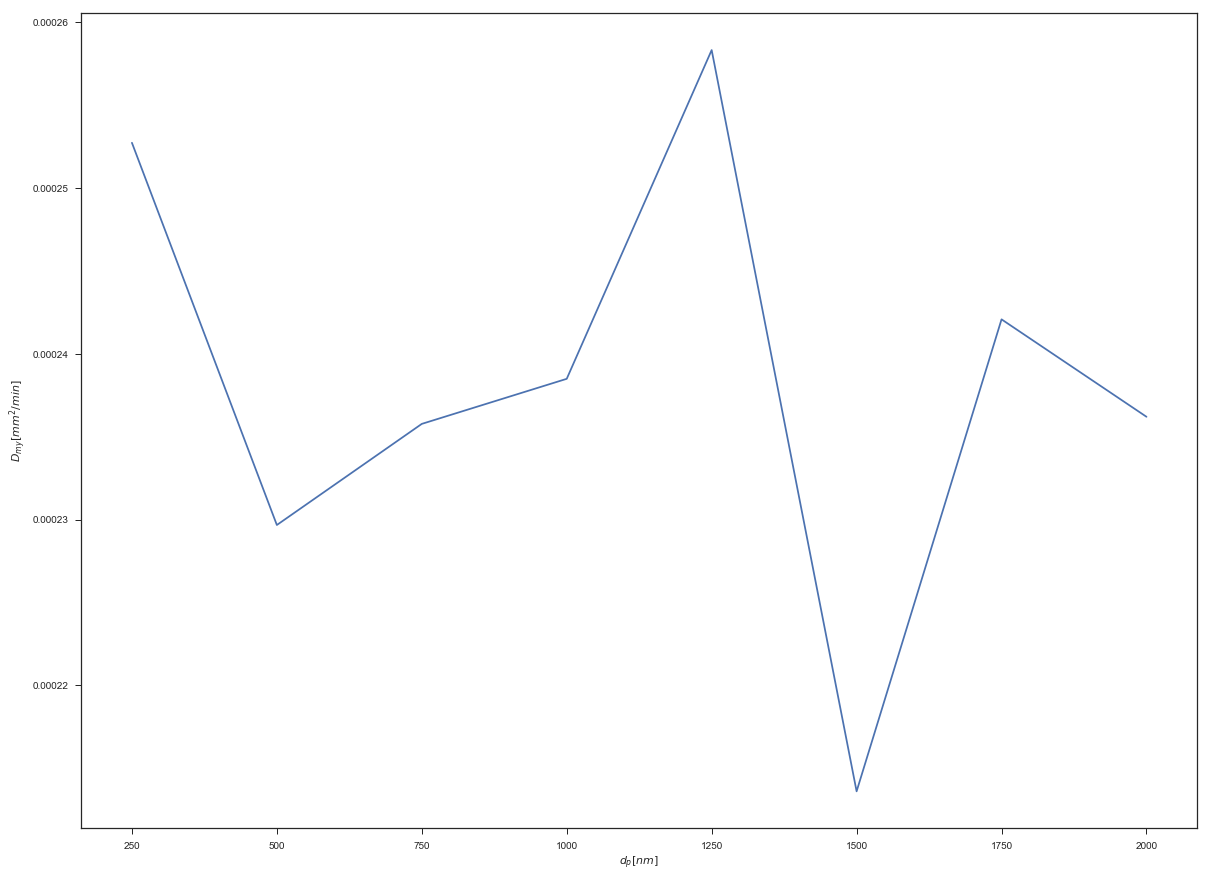

In [131]:
dmy = []
for di in sy2.columns:
    data = sy2[di].iloc[:max_2]
    slope, intercept, r_value, p_value, std_err = stats.linregress(data.index[:300],data.values[:300])
    print("The R^2 value for the diameter {1} [nm] is: {0}".format(r_value**2,di.split("_")[-2]),intercept)
    dmy.append(slope/2)

# slope, intercept, r_value, p_value, std_err = stats.linregress(d,dmy)
# print(r_value)
plt.plot(d,dmy)
plt.ylabel(r"${D_m}_y [{mm^2}/min]$")
plt.xlabel(r"$ d_p [nm]$")

### y- direction with moving average

(271,)
(300,)
('The R^2 value for the diameter 250 [nm] is: 0.902281127036', 27.736807421906512)
(271,)
(300,)
('The R^2 value for the diameter 500 [nm] is: 0.866022177946', 27.742563553520267)
(271,)
(300,)
('The R^2 value for the diameter 750 [nm] is: 0.859254418194', 27.668590512812489)
(271,)
(300,)
('The R^2 value for the diameter 1000 [nm] is: 0.881320027548', 27.648672621786574)
(271,)
(300,)
('The R^2 value for the diameter 1250 [nm] is: 0.887660882256', 27.670049543354796)
(271,)
(300,)
('The R^2 value for the diameter 1500 [nm] is: 0.7859393953', 27.655111191211738)
(271,)
(300,)
('The R^2 value for the diameter 1750 [nm] is: 0.836409902177', 27.736239012202038)
(271,)
(300,)
('The R^2 value for the diameter 2000 [nm] is: 0.855001252197', 27.619011987986493)


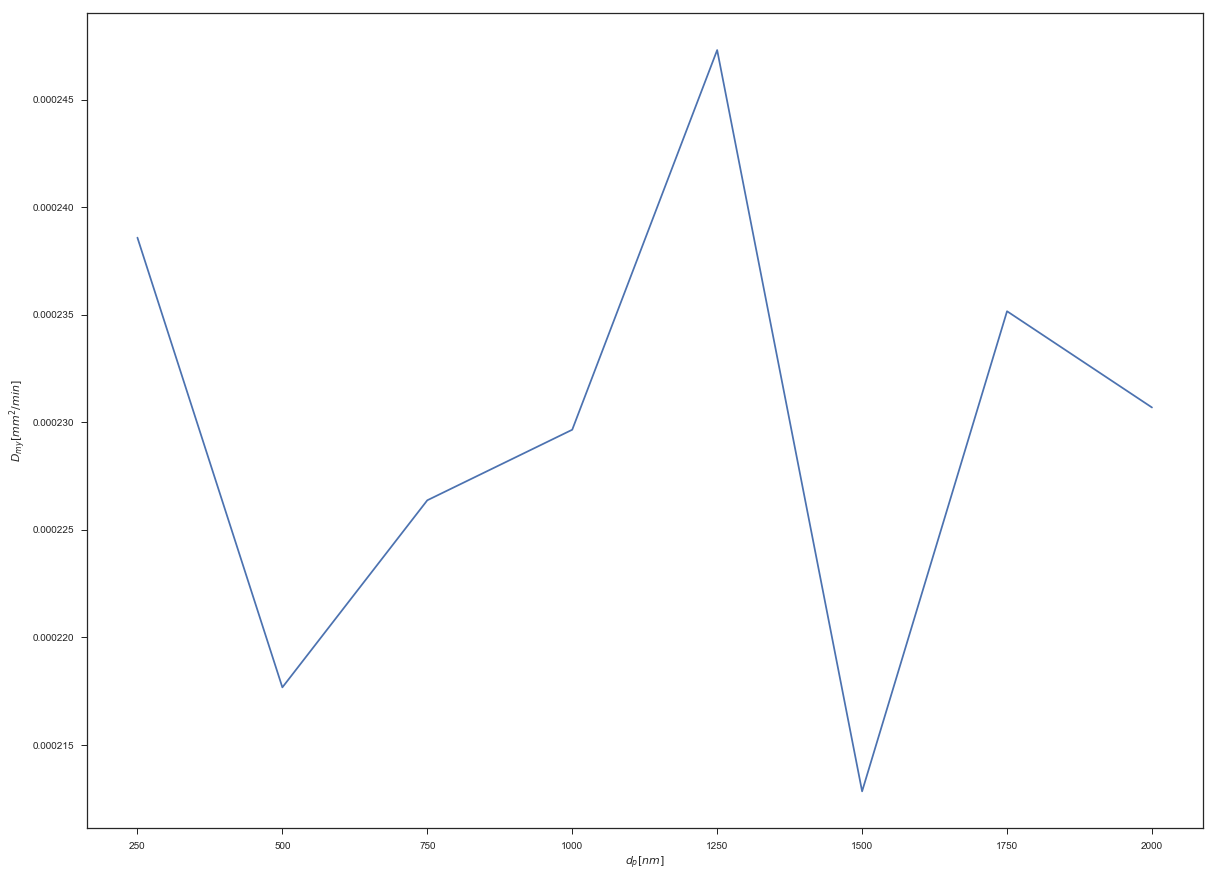

In [132]:
dmyma = []
for di in sy2.columns:
    data = sy2[di].iloc[:max_2]
    ma = moving_average(data.values, n=30)
    print(ma.shape)
    print(data.shape)
    slope, intercept, r_value, p_value, std_err = stats.linregress(data.index[:ma.shape[0]],ma[:300])
    print("The R^2 value for the diameter {1} [nm] is: {0}".format(r_value**2,di.split("_")[-2]),intercept)
    dmyma.append(slope/2)
plt.plot(d,dmyma)
plt.ylabel(r"${D_m}_y [{mm^2}/min]$")
plt.xlabel(r"$ d_p [nm]$")

# Dispersivity

### x-direction

In [133]:
v_av =  0.0000006 # m/s still needs to be checked

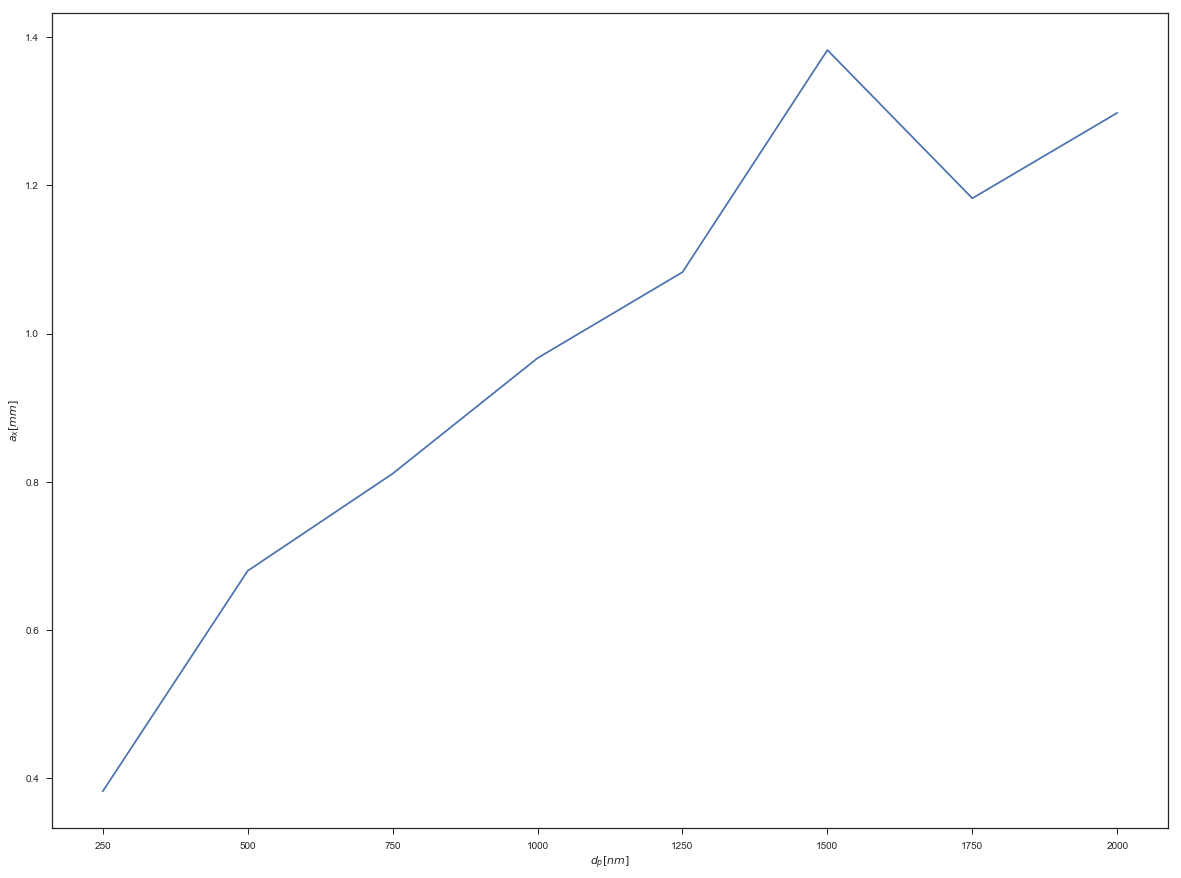

In [134]:
a_x = []
for di in dmx:
    a_x.append(di/v_ave)

plt.plot(d,a_x)
plt.ylabel(r"$a_x [mm]$")
plt.xlabel(r"$ d_p [nm]$")

### y-direction

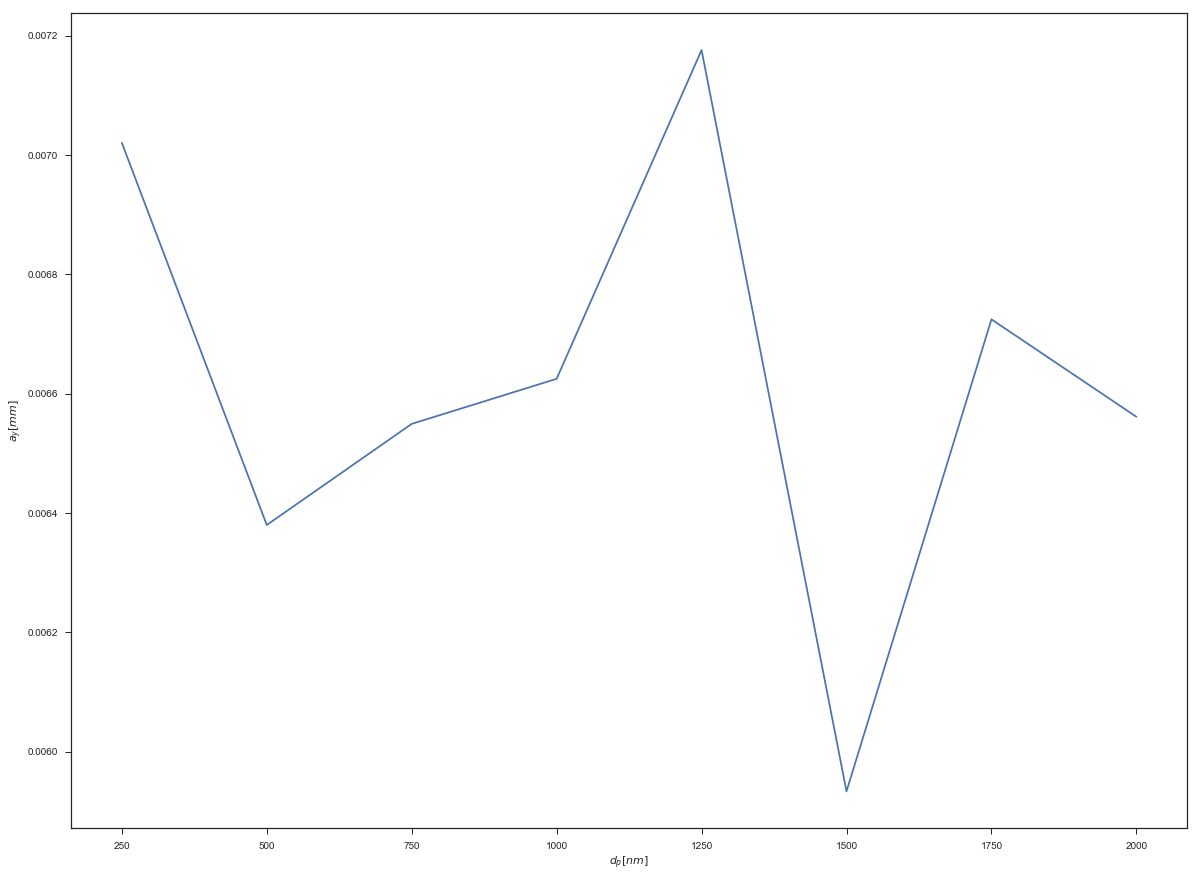

In [135]:
a_y = []
for di in dmy:
    a_y.append(di/v_ave)
plt.plot(d,a_y)
plt.ylabel(r"$a_y [mm]$")
plt.xlabel(r"$ d_p [nm]$")

### y- direction with moving average

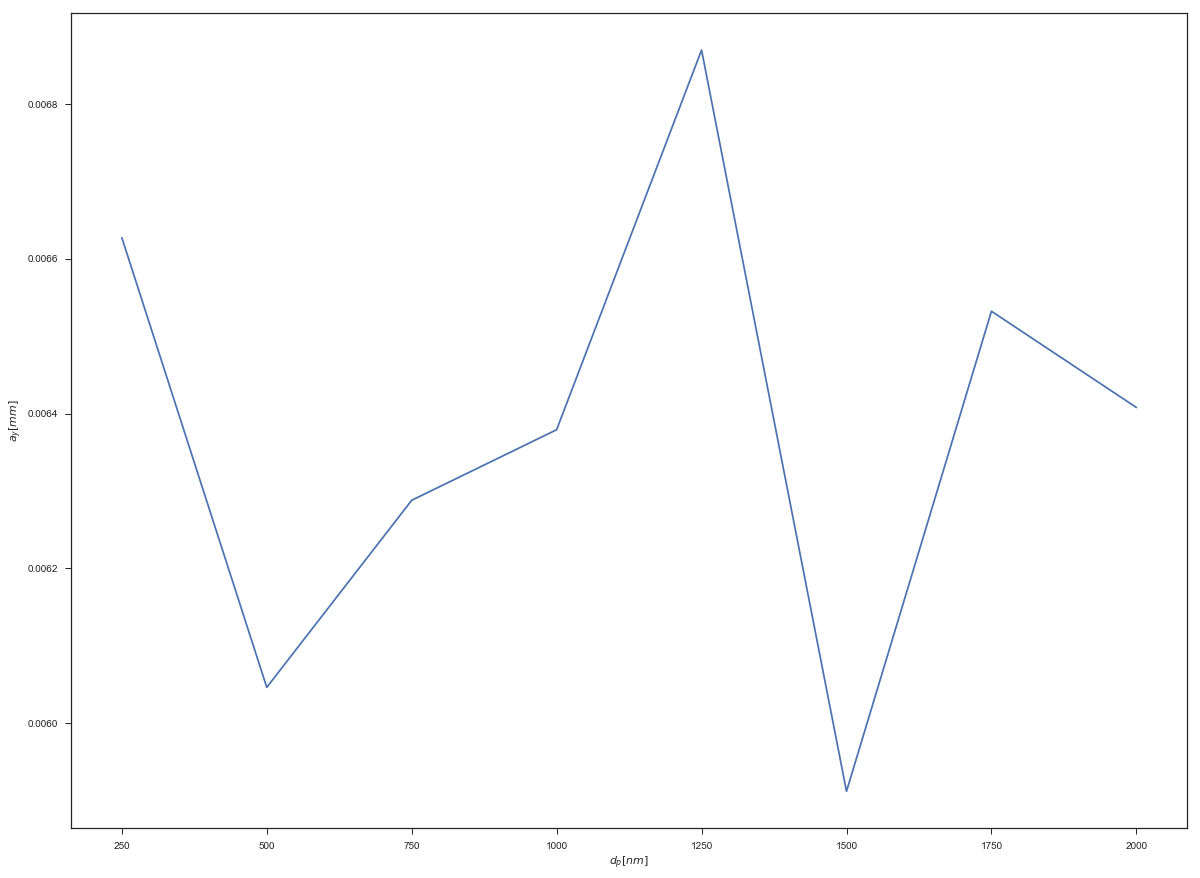

In [136]:
a_yma = []
for di in dmyma:
    a_yma.append(di/v_ave)
plt.plot(d,a_yma)
plt.ylabel(r"$a_y [mm]$")
plt.xlabel(r"$ d_p [nm]$")